<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Pietruszkiewicz/systemy_rekomendacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Grocery

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df = pd.read_csv('GroceryStoreDataSet.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [57]:
def correct_df_items(df):
    corrections = {'COCK': 'CHEESE', 'SUGER': 'SUGAR'}
    df['products'] = df['products'].replace(corrections, regex=True)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
df = pd.read_csv('GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df = correct_df_items(df)
print(df.shape)
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 1)


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [59]:
df.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


products                        
BREAD,TEA,BOURNVITA                 2
COFFEE,CHEESE,BISCUIT,CORNFLAKES    2
BREAD,COFFEE,SUGAR                  2
BREAD,COFFEE,CHEESE                 1
JAM,MAGGI,BREAD,MILK                1
MILK,BREAD,BISCUIT                  1
MAGGI,TEA,CORNFLAKES                1
MAGGI,TEA,BISCUIT                   1
MAGGI,BREAD,TEA,BISCUIT             1
JAM,MAGGI,BREAD,TEA                 1
COFFEE,SUGAR,BOURNVITA              1
COFFEE,SUGAR,CORNFLAKES             1
BREAD,SUGAR,BOURNVITA               1
BREAD,SUGAR,BISCUIT                 1
BREAD,MILK,BISCUIT,CORNFLAKES       1
BREAD,MILK                          1
TEA,MILK,COFFEE,CORNFLAKES          1
Name: count, dtype: int64

In [60]:
data = list(df['products'].apply(lambda x:x.split(',')))
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'CHEESE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'CHEESE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGAR', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'CHEESE'],
 ['BREAD', 'SUGAR', 'BISCUIT'],
 ['COFFEE', 'SUGAR', 'CORNFLAKES'],
 ['BREAD', 'SUGAR', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGAR'],
 ['BREAD', 'COFFEE', 'SUGAR'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [61]:
te = TransactionEncoder()

data_encoded = te.fit(data).transform(data)
df_bool = pd.DataFrame(data_encoded, columns=te.columns_)
df_bool.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,CHEESE,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [62]:
df_encoded = df_bool.astype(int)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,CHEESE,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGAR,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [63]:
from mlxtend.frequent_patterns import apriori

support = apriori(df_bool, min_support=0.15, use_colnames=True).sort_values(by='support', ascending = False)
support

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
9,0.35,(TEA)
5,0.30,(CORNFLAKES)
8,0.30,(SUGAR)
6,0.25,(MAGGI)
7,0.25,(MILK)
15,0.20,"(BREAD, MILK)"
20,0.20,"(SUGAR, COFFEE)"


In [64]:
conf = association_rules(support, metric='zhangs_metric', min_threshold=0.15).sort_values(by='zhangs_metric', ascending=False)
conf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(COFFEE),(CHEESE),0.40,0.15,0.15,0.375000,2.500000,0.0900,1.360000,1.000000
6,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.750000,0.865385
7,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.250000,0.750000
11,(CHEESE),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882
3,(COFFEE),(SUGAR),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
4,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
2,(SUGAR),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
5,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
0,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714
12,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538


In [65]:
conf_2 = association_rules(support, metric="confidence",min_threshold=0.15).sort_values(by='zhangs_metric')
conf_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(BREAD),(COFFEE),0.65,0.40,0.15,0.230769,0.576923,-0.1100,0.780000,-0.676923
17,(COFFEE),(BREAD),0.40,0.65,0.15,0.375000,0.576923,-0.1100,0.560000,-0.550000
6,(BREAD),(TEA),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
12,(BREAD),(BISCUIT),0.65,0.35,0.20,0.307692,0.879121,-0.0275,0.938889,-0.282051
14,(BREAD),(MAGGI),0.65,0.25,0.15,0.230769,0.923077,-0.0125,0.975000,-0.192308
7,(TEA),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
13,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
15,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
9,(SUGAR),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000,0.035714
8,(BREAD),(SUGAR),0.65,0.30,0.20,0.307692,1.025641,0.0050,1.011111,0.071429


In [66]:
# Filmy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
ratings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [71]:
movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [72]:
data = pd.merge(ratings, movies, on='movieId')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [74]:
#liczba wszystkich ocen
num_ratings= data['rating'].count()
print(num_ratings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100836


In [75]:
print(f"Liczba movies: {len(movies)}")

Liczba movies: 9742


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# Sprawdź liczbę unikalnych userId
unique_user_ids = ratings['userId'].nunique()

# Wyświetl wynik
print(f"Liczba unikalnych userId: {unique_user_ids}")

Liczba unikalnych userId: 610


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# Średnią liczbę ocen na użytkownika
mean = num_ratings/unique_user_ids
mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165.30491803278687

In [78]:
# Liczba filmów w bazie
num_movies = data['title'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Średnia liczba ocen na film
mean_by_movie = num_ratings/num_movies
mean_by_movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10.375141475460438

In [80]:
#najczęsciej oceniany film
ratings_count = data.groupby('title').size()
most_rated_movie = ratings_count.idxmax()

most_rated_movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Forrest Gump (1994)'

In [81]:
movie_titles = dict(zip(movies['movieId'],movies['title']))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
#mean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
m= data['rating'].count()/data['title'].count()
m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0

In [84]:
from scipy.sparse import csr_matrix

def create_sparse(data):
  M = data['userId'].nunique()
  N = data['movieId'].nunique()
  user_mapper = dict(zip(np.unique(data["userId"]), list(range(M))))
  movie_mapper = dict(zip(np.unique(data["movieId"]), list(range(N))))
  user_inv_mapper = dict(zip(list(range(M)), np.unique(data["userId"])))
  movie_inv_mapper = dict(zip(list(range(N)), np.unique(data["movieId"])))
  user_index = [user_mapper[i] for i in data['userId']]
  item_index = [movie_mapper[i] for i in data['movieId']]
  X = csr_matrix((data["rating"], (user_index, item_index)), shape=(M,N))
  return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
import numpy as np

M = data['userId'].nunique()
N = data['movieId'].nunique()
user_mapper = dict(zip(np.unique(data["userId"]), list(range(M))))
movie_mapper = dict(zip(np.unique(data["movieId"]), list(range(N))))
user_inv_mapper = dict(zip(list(range(M)), np.unique(data["userId"])))
movie_inv_mapper = dict(zip(list(range(N)), np.unique(data["movieId"])))
user_index = [user_mapper[i] for i in data['userId']]
item_index = [movie_mapper[i] for i in data['movieId']]
X = csr_matrix((data["rating"], (user_index, item_index)), shape=(M,N))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz #scipy.sparse.csr_matrix.nnz no of stored values, including explicit 0
sparsity = n_ratings/n_total
sparsity_p = round(sparsity*100,2)
print(f"Matrix sparsity: {sparsity_p}%")
n_ratings_per_user = X.getnnz(axis=1)

Matrix sparsity: 1.7%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
n_rating_uzytkownik = X.getnnz(axis=1)
print("Wszystkie oceny dla użytkownika:", n_rating_uzytkownik)

Wszystkie oceny dla użytkownika: [ 232   29   39  216   44  314  152   47   46  140   64   32   31   48
  135   98  105  502  703  242  443  119  121  110   26   21  135  570
   81   34   50  102  156   86   23   60   21   78  100  103  217  440
  114   48  399   42  140   33   21  310  359  130   20   33   25   46
  476  112  107   22   39  366  271  517   34  345   36 1260   46   62
   35   45  210  177   69  119   29   61   64  167   26  227  118  293
   34   70   21   56  518   54  575   24   97   56  168   78   36   92
   53  148   61   56  377  273  722   33   34   76  127   51  646   65
  150   31  112   87  165   22  215   22   58  292   56   50  360   38
   22   33  140   28   69  347   35   35  279  111  141   22  194  608
  168   38   71  128   23   32   20   48   58   26   59   63  179   34
   46  398   21   26   97  437   39   38   23   36   65  190  173   94
  269   50   82   26   25   67   24   36  904   77   69   24  118  977
   57  134   47  226  258   48   20   66   8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
#liczba filmów wg rodzaju
genre_lists = list(movies['genres'].apply(lambda x: x.lower().split('|')))
genre_list = []

for genres in genre_lists:
  genre_list.extend(genres)

print("Set of unique genres (lowercase):", set(genre_list))
genre_df = pd.DataFrame(genre_list)
genre_df.value_counts()

Set of unique genres (lowercase): {'musical', 'western', 'action', 'comedy', 'fantasy', 'war', 'film-noir', 'imax', 'drama', 'adventure', 'sci-fi', 'documentary', 'thriller', 'mystery', 'horror', 'romance', 'crime', 'children', '(no genres listed)', 'animation'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


drama                 4361
comedy                3756
thriller              1894
action                1828
romance               1596
adventure             1263
crime                 1199
sci-fi                 980
horror                 978
fantasy                779
children               664
animation              611
mystery                573
documentary            440
war                    382
musical                334
western                167
imax                   158
film-noir               87
(no genres listed)      34
Name: count, dtype: int64

In [91]:
# Sprawdzanie liczby filmów dla dzieci
children_movies_count = movies[movies['genres'].str.contains('children', case=False)].shape[0]
print("\nLiczba filmów dla dzieci:", children_movies_count)


Liczba filmów dla dzieci: 664


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1, -1)
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    neighbour = neighbour[0][1:]  # Pomijamy pierwszy element, który jest samym filmem
    for n in neighbour:
        neighbour_ids.append(movie_inv_mapper[n])
    return neighbour_ids

# Przykładowe użycie funkcji do znalezienia 10 rekomendacji dla filmu o identyfikatorze 1 (Toy Story)
recommendations = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)

# Wyświetlenie rekomendacji
for i, movie_id in enumerate(recommendations, 1):
    print(f"{i}. {movie_titles[movie_id]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Toy Story 2 (1999)
2. Jurassic Park (1993)
3. Independence Day (a.k.a. ID4) (1996)
4. Star Wars: Episode IV - A New Hope (1977)
5. Forrest Gump (1994)
6. Lion King, The (1994)
7. Star Wars: Episode VI - Return of the Jedi (1983)
8. Mission: Impossible (1996)
9. Groundhog Day (1993)
10. Back to the Future (1985)


In [90]:
from datetime import datetime

ratings['rating_year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Distribution of 1995 film ratings:
rating
0.5      50
1.0     254
1.5      75
2.0     522
2.5     244
3.0    1701
3.5     467
4.0    1625
4.5     308
5.0     898
Name: count, dtype: int64


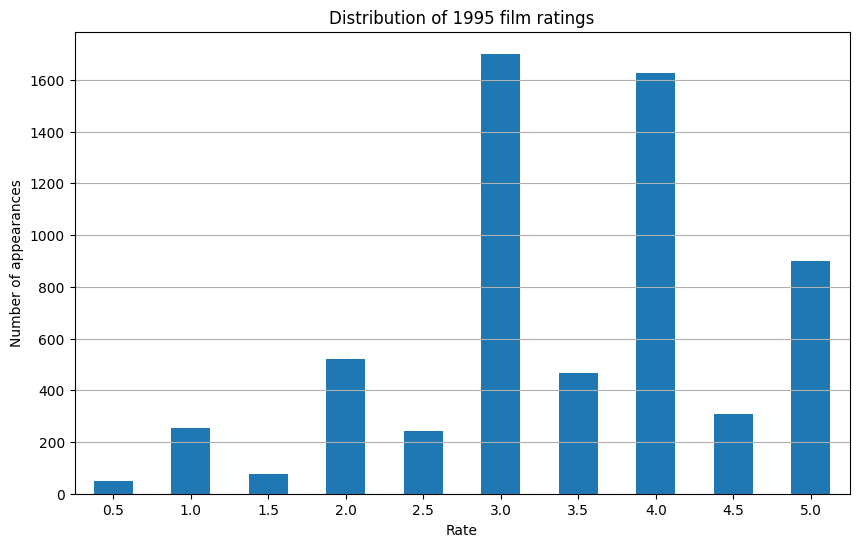

In [100]:
# wyrzucamy rok z tytułów
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Tworzymy movieId
ratingsJoin = ratings.merge(movies, on='movieId', how='inner')

# Filtr po 1995
ratings_1995 = ratingsJoin[ratingsJoin['year'] == '1995']
ratings_distribution_1995 = ratings_1995['rating'].value_counts().sort_index()

print("Distribution of 1995 film ratings:")
print(ratings_distribution_1995)

plt.figure(figsize=(10, 6))
ratings_distribution_1995.plot(kind='bar')
plt.title('Distribution of 1995 film ratings')
plt.xlabel('Rate')
plt.ylabel('Number of appearances')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [99]:
#Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane
actionMovies = ratingsJoin[ratingsJoin['genres'].str.contains('action', case=False)]

average_rating_action = actionMovies['rating'].mean()
print(f"Average ratings for action movies: {average_rating_action}")

top_three = actionMovies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
print(f"\nThe three highest rated action films: {top_three}")

Average ratings for action movies: 3.447984331646809

The three highest rated action films: title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# Install surprise library
!pip install surprise

# Importing relevant libraries
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming 'ratings' DataFrame is already loaded
# Get minimum and maximum rating from the dataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Define the algorithm
algo = SVD()

# Perform cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357244 sha256=02edf936d6eb41f950e0b4a066f169419fc67a5738e0936ab29df0ea3da0e35f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8758  0.8647  0.8745  0.8731  0.8762  0.8729  0.0042  
MAE (testset)     0.6740  0.6669  0.6716  0.6684  0.6736  0.6709  0.0028  
Fit time          2.15    2.69    2.34    3.03    2.17    2.48    0.34    
Test time         0.15    0.36    0.26    0.16    0.15    0.22    0.08    


{'test_rmse': array([0.87582199, 0.86469952, 0.8744793 , 0.87310077, 0.87622102]),
 'test_mae': array([0.6739521 , 0.66692551, 0.67158446, 0.66841128, 0.67358416]),
 'fit_time': (2.152061939239502,
  2.6902332305908203,
  2.3415184020996094,
  3.0322957038879395,
  2.165592908859253),
 'test_time': (0.14772677421569824,
  0.36213135719299316,
  0.26310014724731445,
  0.15859436988830566,
  0.15032172203063965)}

In [94]:
trainset, testset = train_test_split(data, test_size=0.25)

algo = SVD()

# trenujemy algorytm
algo.fit(trainset)
predictions = algo.test(testset)

# RMSE
accuracy.rmse(predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 0.8715


0.8714572285849018

In [95]:
!pip install scikit-learn
from numpy import mean
from numpy import std

import sklearn.model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold # StratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Tworzymy zbiór danych
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1) # prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
from sklearn.tree import DecisionTreeClassifier

# Utworzenie modelu drzewa decyzyjnego
model = DecisionTreeClassifier()

# Ocena modelu przy użyciu walidacji krzyżowej
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Wyświetlenie wyników
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.670 (0.090)
